# Load a Model, Test it on SNLI test set

In [ ]:
# using argparse:
!python train.py --mode test --optimizer adam --sent_encoder_model bilstmmax

In [ ]:
# using jupyter notebook:
from train import SentenceClassification

# set parameters
sent_encoder_model = "bilstmmax"
optimizer = "adam" # or "sgd"
trainer = SentenceClassification(sent_encoder_model=sent_encoder_model, epochs=max_epochs, seed=seed, resume_training=resume_training, verbose=False, optimizer_name=optimizer)

# testing
trainer.test_model()

## Inference Example

In [ ]:
output = trainer.infer("The cat is on the mat", "The cat is not on the mat")

print(f'Predicted Class: {output["label"]}')
print(f'Scores: {output["output"]}')

# Results
The models trained on SNLI achieve the following results both on the SNLI test set and on the SentEval benchmark. 

using optimizer `Adam`:

|        |      | Baseline, 18e | BiLSTM, 5e | BiLSTM-Max, 8e | UniLSTM, e11 |
|--------|------|---------------|------------|----------------|--------------|
| NLI    | Dev  | 0.733         | 0.827      | 0.834          | 0.832        |
|        | Test | 0.734         | 0.824      | 0.830          | 0.820        |
| MR     | Dev  | 0.751         | 0.569      | 0.569          | 0.570        |
|        | Test | 0.752         | 0.565      | 0.565          | 0.566        |
| CR     | Dev  | 0.791         | 0.065      | 0.065          | 0.655        |
|        | Test | 0.793         | 0.650      | 0.650          | 0.649        |
| SUBJ   | Dev  | 0.905         | 0.704      | 0.704          | 0.703        |
|        | Test | 0.906         | 0.706      | 0.706          | 0.708        |
| MPQA   | Dev  | 0.846         | 0.777      | 0.777          | 0.777        |
|        | Test | 0.848         | 0.774      | 0.774          | 0.775        |
| SST2   | Dev  | 0.781         | 0.571      | 0.571          | 0.570        |
|        | Test | 0.780         | 0.582      | 0.582          | 0.582        |
| TREC   | Dev  | 0.674         | 0.229      | 0.229          | 0.229        |
|        | Test | 0.716         | 0.188      | 0.188          | 0.188        |
| SICK-E | Dev  | 0.810         | 0.564      | 0.564          | 0.564        |
|        | Test | 0.777         | 0.567      | 0.567          | 0.567        |
| MRPC   | Dev  | 0.711         | 0.675      | 0.675          | 0.675        |
|        | Test | 0.712         | 0.665      | 0.665          | 0.665        |

using optimizer `SGD`:
|        |      | Baseline, e9 | BiLSTM, e5 | BiLSTM-Max, 5e | UniLSTM, e9 |
|--------|------|--------------|------------|----------------|-------------|
| NLI    | Dev  | 0.532        | 0.709      | 0.798          | 0.696       |
|        | Test | 0.536        | 0.720      | 0.800          | 0.707       |
| MR     | Dev  | 0.751        | 0.569      | 0.569          | 0.570       |
|        | Test | 0.752        | 0.565      | 0.565          | 0.566       |
| CR     | Dev  | 0.791        | 0.655      | 0.655          | 0.655       |
|        | Test | 0.793        | 0.650      | 0.650          | 0.649       |
| SUBJ   | Dev  | 0.905        | 0.704      | 0.704          | 0.703       |
|        | Test | 0.906        | 0.706      | 0.706          | 0.708       |
| MPQA   | Dev  | 0.846        | 0.777      | 0.777          | 0.777       |
|        | Test | 0.848        | 0.774      | 0.774          | 0.775       |
| SST2   | Dev  | 0.781        | 0.571      | 0.571          | 0.570       |
|        | Test | 0.780        | 0.582      | 0.582          | 0.582       |
| TREC   | Dev  | 0.674        | 0.229      | 0.229          | 0.229       |
|        | Test | 0.716        | 0.188      | 0.188          | 0.188       |
| SICK-E | Dev  | 0.810        | 0.564      | 0.564          | 0.564       |
|        | Test | 0.777        | 0.567      | 0.567          | 0.567       |
| MRPC   | Dev  | 0.711        | 0.675      | 0.675          | 0.675       |
|        | Test | 0.712        | 0.665      | 0.665          | 0.665       |

According to the paper reproduced, during training of the models, the SGD optimizer was used. But NLI uses Adam optimizer. The submission includes both results using Adam and SGD with the learnig rate shrinkage approach. The results of our experiments differ depending on which optimizer is used. Especially the baseline model performs much better. For the other models there is also a gap in accuracy noticable but not as large as for the baseline model. Accuracies are plus minus comparable to the original results (when we train the models using Adam optimizer). 

The performance on the transfer tasks varies more than the performance on the original task NLI. The best performing model on the transfer tasks is the baseline model which averages embedding to obtain sentence representations. This is unexpected. All LSTM variations seem to be performing equally on the transfer tasks, obtaining results that are significantly lower than on the original task.

## Error Analysis

Adam optimizer loss decreases stronger, SGD optimizer loss decreases too slowly. This is likely caused because the lr is shrunk too fast. This leads to the effect that also the accuracy is lower for the SGD optimizer. Training stopped after 20 epochs or if the lr was below a threshold. For Adam we trained for 20 epochs and kept the best performing model in terms of validation accuracy.
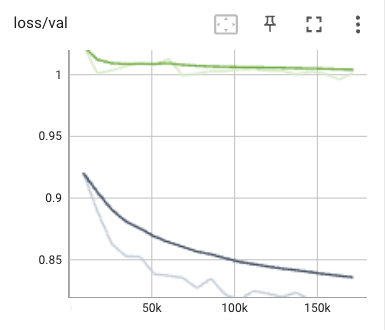

Comparing the losses of the LSTM model variants:
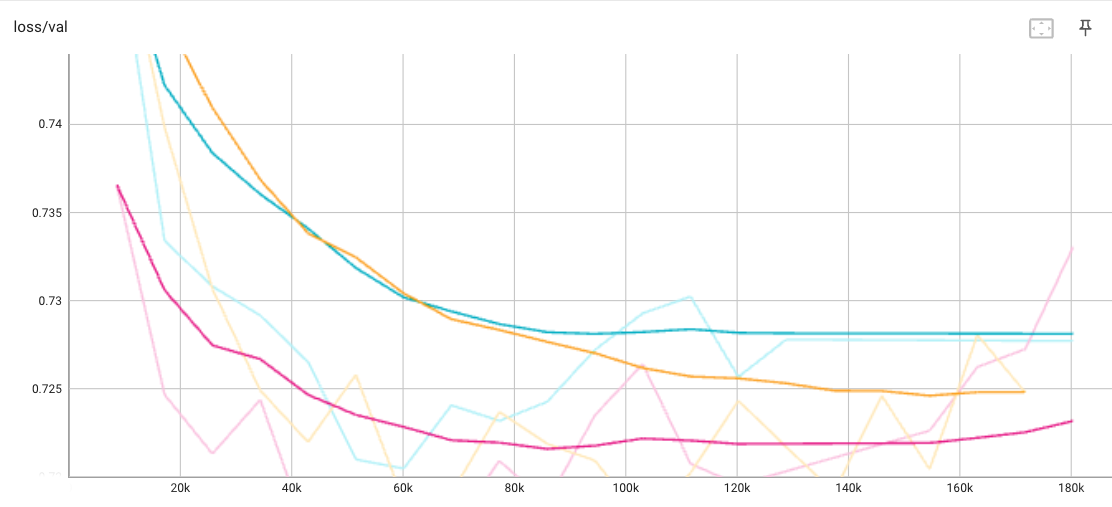

In absolute terms the losses are very similar, but we notice that BiLSTMMax seems to converge fastest, and then starts overfitting around step 180'000.

The models trained using SGD optimizer (as in the paper) perform worse than the models trained using Adam optimizer. Losses very to a greater extend between the models. As expected UniLSTM performs worst, then BiLSTM, and BiLSTMMax performs best, managing best to adapt to the task at hand. 
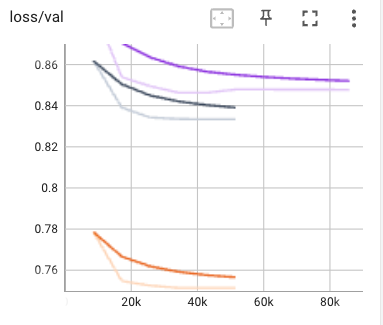



### Problematic Cases
```
Premise - “Two men sitting in the sun” 
Hypothesis - “Nobody is sitting in the shade”
```

Label - Neutral (likely predicts contradiction)


```
Premise - “A man is walking a dog” 
Hypothesis - “No cat is outside”
```

Label - Neutral (likely predicts contradiction)

**Can you think of a possible reason why the model would fail in such cases?**
> Possible reasons for failure here could be that because of the large semantic difference (in the second example) between dog and cat, the model is not able to understand the context of the sentence, and is only able to understand the words in isolation. The sentence embedding is influenced by these contrastive words and the classifier tends then to predict the opposite label, as the sentence embeddings are not similar enough. 
> 
> In the first example, the model is not able to understand the correct semantic implications that follow from the first sentence. It does not recognize a conclusion that logically could follow from the premise. As it could be that other people exist, not only the two man in the sun. The semantic representation of a sentence is not enough to understand the implications the second sentence has.